
=== Multi-Horizon Forecast Setup for ADA ===
ADA final train shape: (2097, 20), test shape: (525, 20)


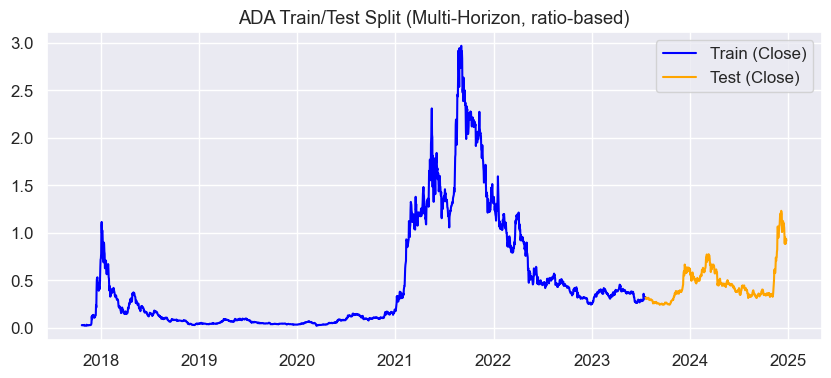

[Info] Saved ADA multi-horizon train data => ada_train_multi.csv
[Info] Saved ADA multi-horizon test data  => ada_test_multi.csv

=== Multi-Horizon Forecast Setup for AVAX ===
AVAX final train shape: (1228, 20), test shape: (307, 20)


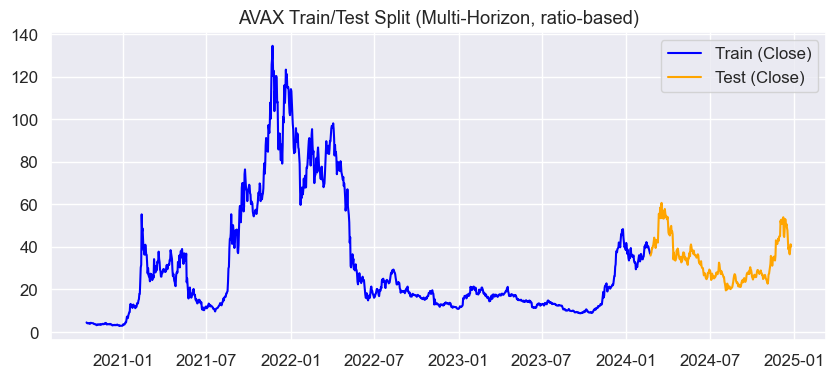

[Info] Saved AVAX multi-horizon train data => avax_train_multi.csv
[Info] Saved AVAX multi-horizon test data  => avax_test_multi.csv

=== Multi-Horizon Forecast Setup for BCH ===
BCH final train shape: (2153, 20), test shape: (539, 20)


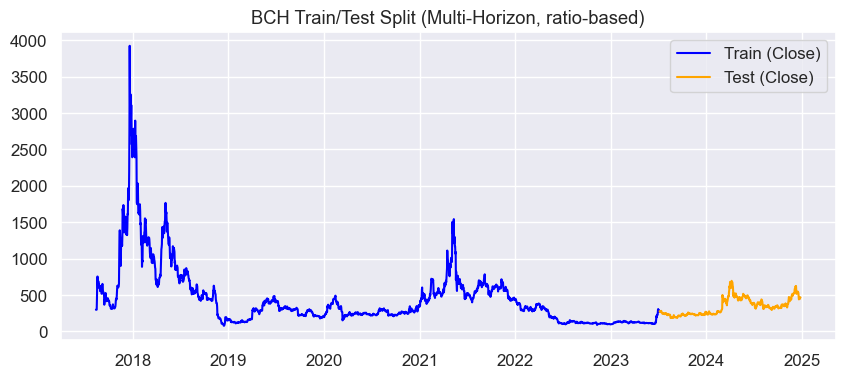

[Info] Saved BCH multi-horizon train data => bch_train_multi.csv
[Info] Saved BCH multi-horizon test data  => bch_test_multi.csv

=== Multi-Horizon Forecast Setup for BNB ===
BNB final train shape: (2152, 20), test shape: (538, 20)


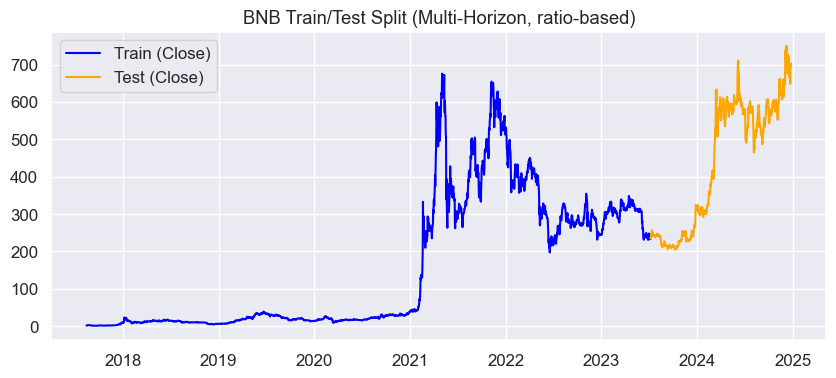

[Info] Saved BNB multi-horizon train data => bnb_train_multi.csv
[Info] Saved BNB multi-horizon test data  => bnb_test_multi.csv

=== Multi-Horizon Forecast Setup for BTC ===
BTC final train shape: (4207, 20), test shape: (1052, 20)


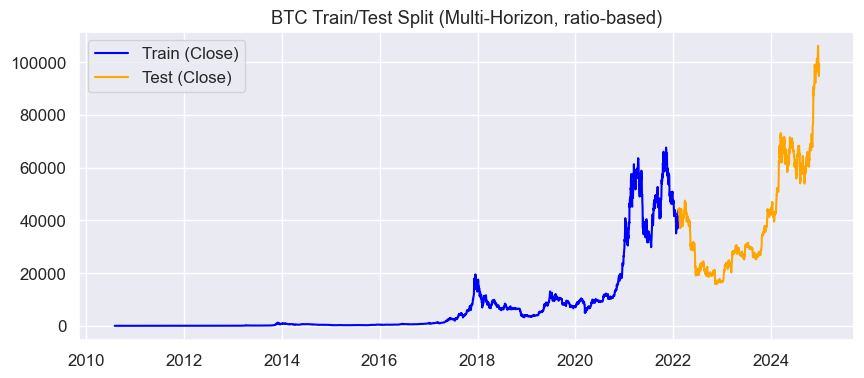

[Info] Saved BTC multi-horizon train data => btc_train_multi.csv
[Info] Saved BTC multi-horizon test data  => btc_test_multi.csv

=== Multi-Horizon Forecast Setup for DOGE ===
DOGE final train shape: (3206, 20), test shape: (802, 20)


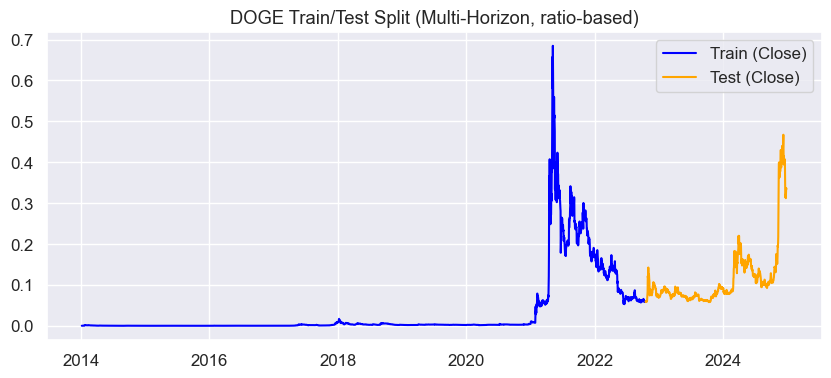

[Info] Saved DOGE multi-horizon train data => doge_train_multi.csv
[Info] Saved DOGE multi-horizon test data  => doge_test_multi.csv

=== Multi-Horizon Forecast Setup for DOT ===
DOT final train shape: (1254, 20), test shape: (314, 20)


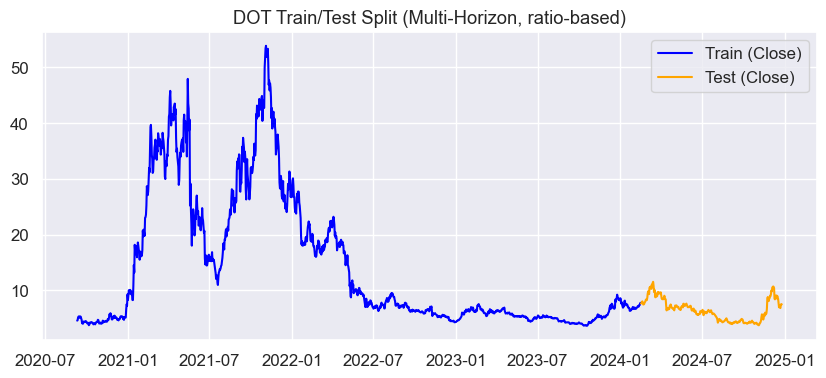

[Info] Saved DOT multi-horizon train data => dot_train_multi.csv
[Info] Saved DOT multi-horizon test data  => dot_test_multi.csv

=== Multi-Horizon Forecast Setup for ETH ===
ETH final train shape: (2726, 20), test shape: (682, 20)


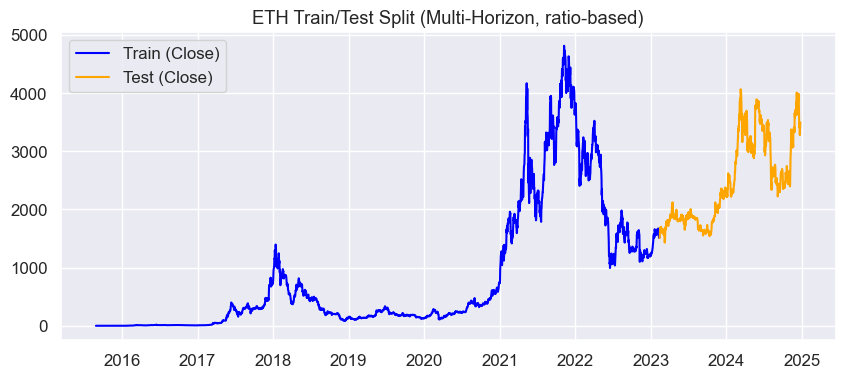

[Info] Saved ETH multi-horizon train data => eth_train_multi.csv
[Info] Saved ETH multi-horizon test data  => eth_test_multi.csv

=== Multi-Horizon Forecast Setup for LEO ===
LEO final train shape: (1620, 20), test shape: (405, 20)


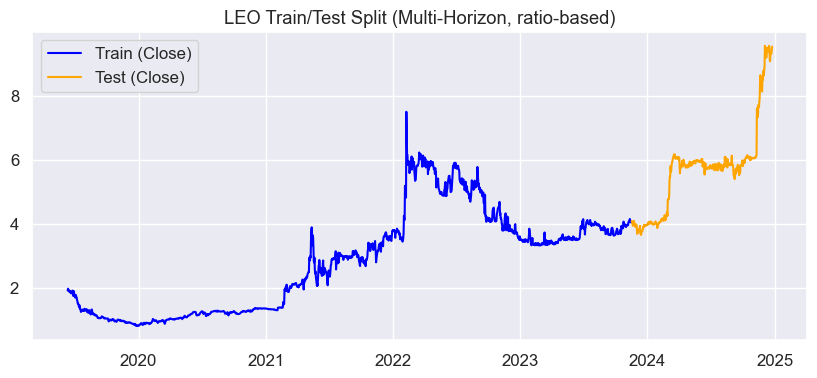

[Info] Saved LEO multi-horizon train data => leo_train_multi.csv
[Info] Saved LEO multi-horizon test data  => leo_test_multi.csv

=== Multi-Horizon Forecast Setup for LINK ===
LINK final train shape: (2105, 20), test shape: (527, 20)


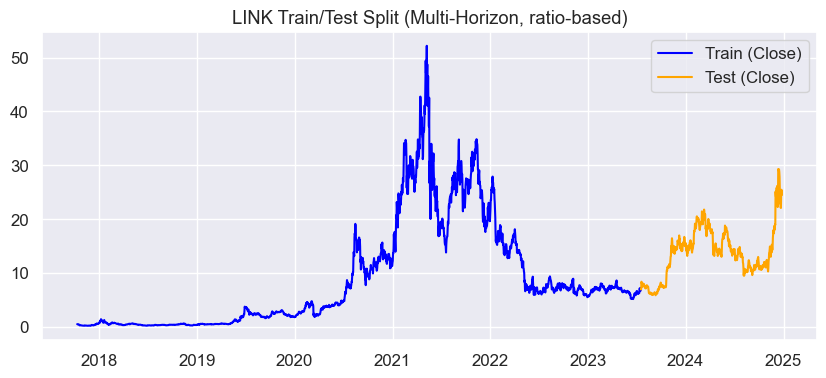

[Info] Saved LINK multi-horizon train data => link_train_multi.csv
[Info] Saved LINK multi-horizon test data  => link_test_multi.csv

=== Multi-Horizon Forecast Setup for LTC ===
LTC final train shape: (3391, 20), test shape: (848, 20)


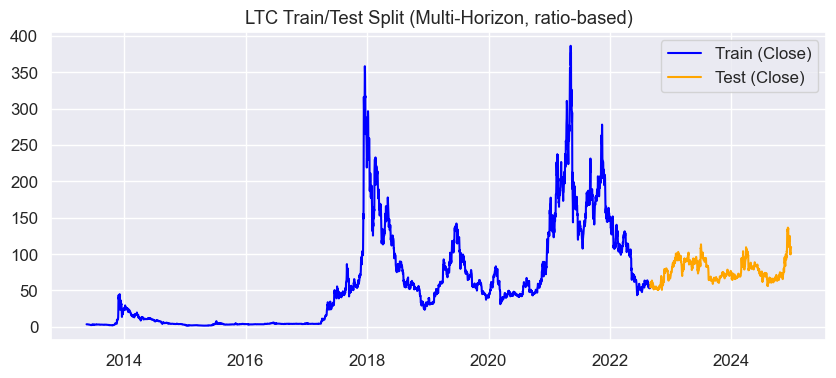

[Info] Saved LTC multi-horizon train data => ltc_train_multi.csv
[Info] Saved LTC multi-horizon test data  => ltc_test_multi.csv

=== Multi-Horizon Forecast Setup for MATIC ===
MATIC final train shape: (1637, 20), test shape: (410, 20)


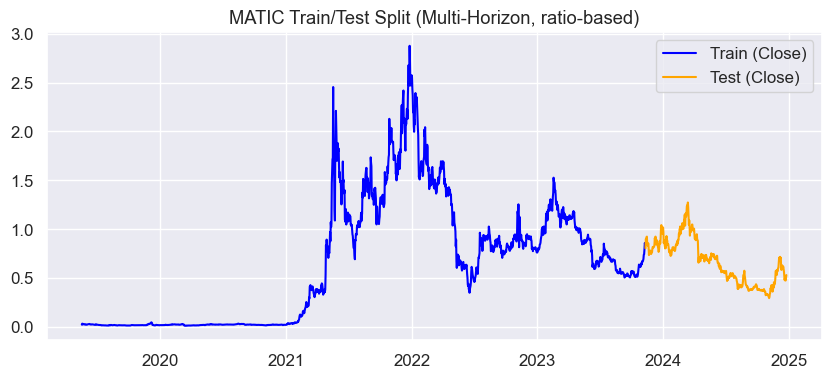

[Info] Saved MATIC multi-horizon train data => matic_train_multi.csv
[Info] Saved MATIC multi-horizon test data  => matic_test_multi.csv

=== Multi-Horizon Forecast Setup for NEAR ===
NEAR final train shape: (1211, 20), test shape: (303, 20)


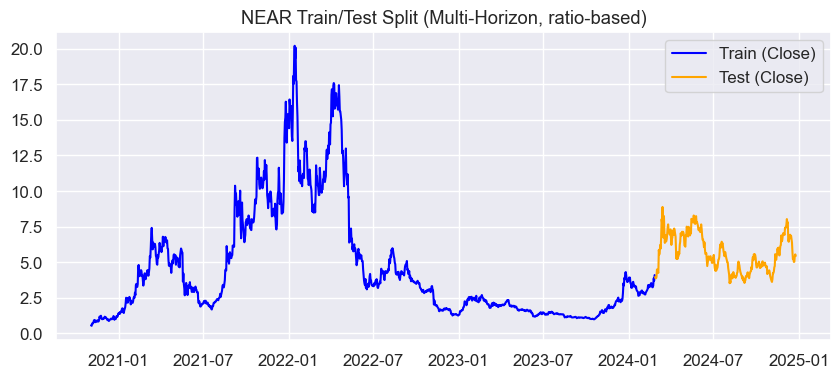

[Info] Saved NEAR multi-horizon train data => near_train_multi.csv
[Info] Saved NEAR multi-horizon test data  => near_test_multi.csv

=== Multi-Horizon Forecast Setup for SHIB ===
SHIB final train shape: (1269, 20), test shape: (318, 20)


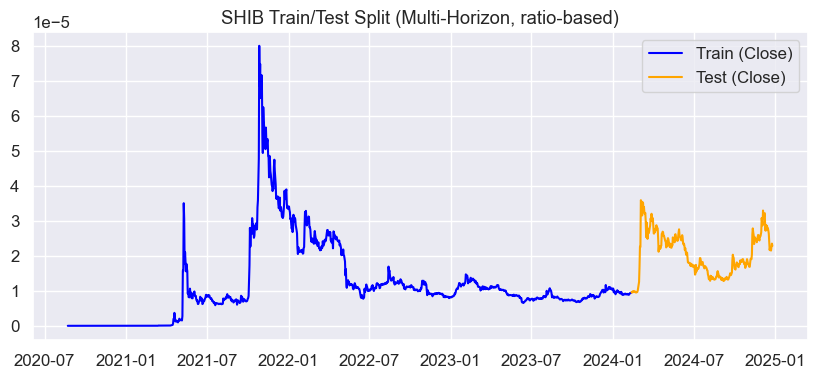

[Info] Saved SHIB multi-horizon train data => shib_train_multi.csv
[Info] Saved SHIB multi-horizon test data  => shib_test_multi.csv

=== Multi-Horizon Forecast Setup for SOL ===
SOL final train shape: (1360, 20), test shape: (340, 20)


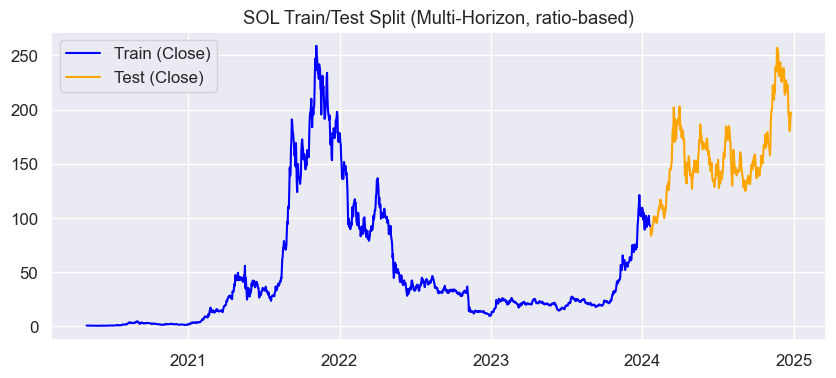

[Info] Saved SOL multi-horizon train data => sol_train_multi.csv
[Info] Saved SOL multi-horizon test data  => sol_test_multi.csv

=== Multi-Horizon Forecast Setup for TON ===
TON final train shape: (957, 20), test shape: (240, 20)


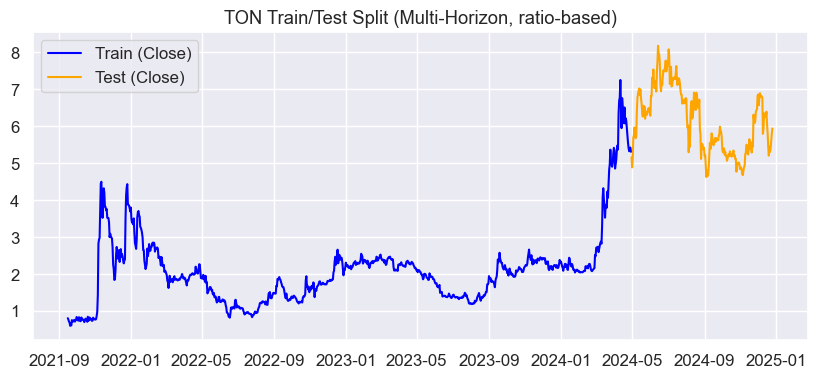

[Info] Saved TON multi-horizon train data => ton_train_multi.csv
[Info] Saved TON multi-horizon test data  => ton_test_multi.csv

=== Multi-Horizon Forecast Setup for TRX ===
TRX final train shape: (2112, 20), test shape: (528, 20)


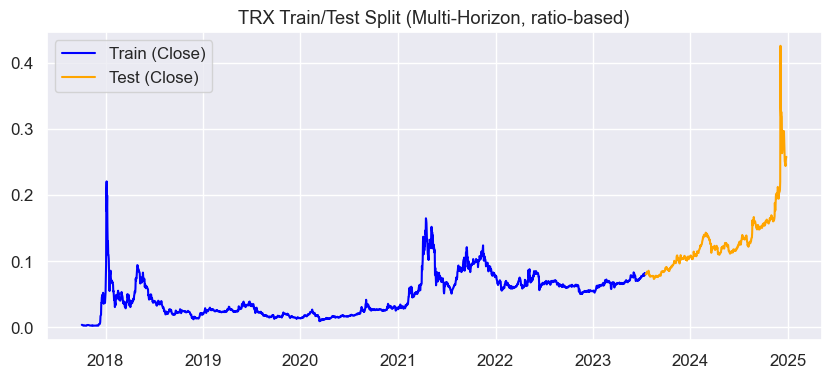

[Info] Saved TRX multi-horizon train data => trx_train_multi.csv
[Info] Saved TRX multi-horizon test data  => trx_test_multi.csv

=== Multi-Horizon Forecast Setup for UNI ===
UNI final train shape: (1232, 20), test shape: (308, 20)


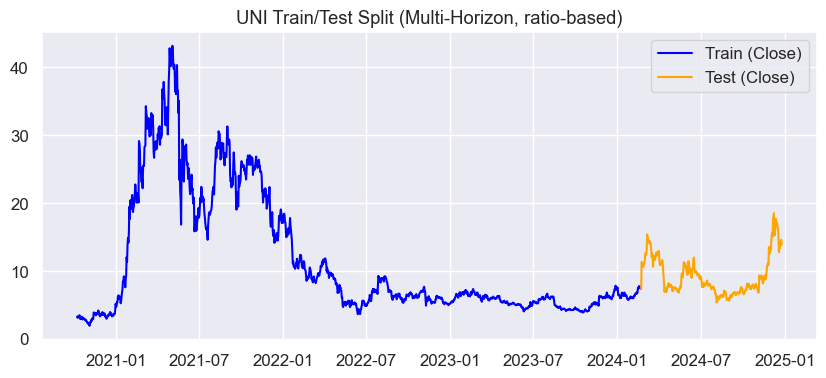

[Info] Saved UNI multi-horizon train data => uni_train_multi.csv
[Info] Saved UNI multi-horizon test data  => uni_test_multi.csv

=== Multi-Horizon Forecast Setup for XRP ===
XRP final train shape: (3312, 20), test shape: (829, 20)


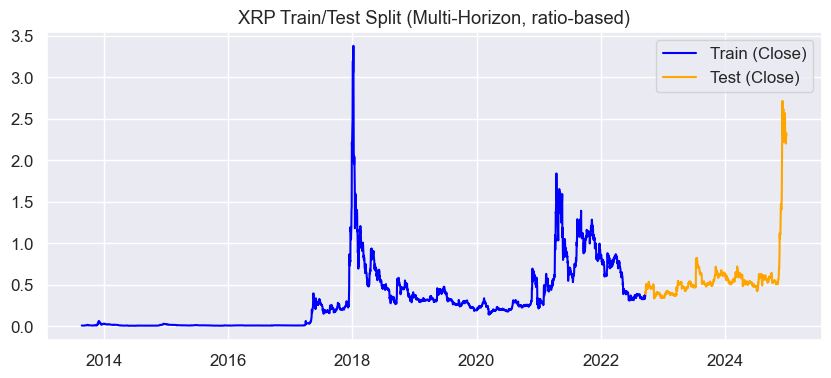

[Info] Saved XRP multi-horizon train data => xrp_train_multi.csv
[Info] Saved XRP multi-horizon test data  => xrp_test_multi.csv


In [1]:
# 03_multihorizon_forecast_setup_ratio.ipynb (or .py)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale=1.1)

DATA_FOLDER = '../data'

# Replace with your actual tickers:
TICKERS = [
    "ADA", "AVAX", "BCH", "BNB", "BTC", "DOGE", "DOT", "ETH", "LEO", "LINK",
    "LTC", "MATIC", "NEAR", "SHIB", "SOL", "TON", "TRX", "UNI", "XRP"
]

# Define the horizons to forecast (days in the future)
HORIZONS = [1, 7, 30, 90]  # 1-day, 1-week, 1-month, 3-month

for ticker in TICKERS:
    print(f"\n=== Multi-Horizon Forecast Setup for {ticker} ===")

    # 1) Load the feature CSV, e.g. "ADA_features.csv"
    features_csv = f"{ticker}_features.csv"
    features_path = os.path.join(DATA_FOLDER, features_csv)
    if not os.path.exists(features_path):
        print(f"[Skipping] Features file not found: {features_path}")
        continue

    df = pd.read_csv(features_path, parse_dates=['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)

    # 2) Quick check of data length
    if len(df) < 50:
        print(f"[Skipping] {ticker} => Only {len(df)} rows, too small for multi-horizon.")
        continue

    # 3) Create multi-horizon target columns: 'Close_t+1', 'Close_t+7', etc.
    for h in HORIZONS:
        col_name = f"Close_t+{h}"
        df[col_name] = df['Close'].shift(-h)  # shift upward by h => future close

    # 4) Drop rows that became NaN from shifting
    df.dropna(inplace=True)
    if len(df) == 0:
        print(f"[Skipping] {ticker} => No rows left after shifting.")
        continue

    # 5) Ratio-based train/test split (80% train, 20% test)
    split_idx = int(len(df) * 0.8)
    train_df = df.iloc[:split_idx].copy()
    test_df  = df.iloc[split_idx:].copy()

    if len(train_df) < 10 or len(test_df) < 5:
        print(f"[Skipping] {ticker} => Not enough train/test rows.")
        continue

    print(f"{ticker} final train shape: {train_df.shape}, test shape: {test_df.shape}")

    # 6) Quick visual: plot train/test Close over time
    plt.figure(figsize=(10,4))
    plt.plot(train_df.index, train_df['Close'], label='Train (Close)', color='blue')
    plt.plot(test_df.index,  test_df['Close'],  label='Test (Close)',  color='orange')
    plt.title(f"{ticker} Train/Test Split (Multi-Horizon, ratio-based)")
    plt.legend()
    plt.show()

    # 7) Save final CSVs
    train_csv = f"{ticker.lower()}_train_multi.csv"
    test_csv  = f"{ticker.lower()}_test_multi.csv"
    train_df.to_csv(os.path.join(DATA_FOLDER, train_csv))
    test_df.to_csv(os.path.join(DATA_FOLDER, test_csv))
    print(f"[Info] Saved {ticker} multi-horizon train data => {train_csv}")
    print(f"[Info] Saved {ticker} multi-horizon test data  => {test_csv}")
